In [1]:
import os
import json
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import statistics

from scipy.stats import ttest_ind, shapiro, mannwhitneyu

In [2]:
path = r'corpus_finished_new'

# Load German tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load('de_core_news_md')

# Initialize data structures
nouns_gender = {'m': Counter(), 'w': Counter()}
adjectives_gender = {'m': Counter(), 'w': Counter()}
noun_ratios_gender = {'m': [], 'w': []}
adjectives_ratios_gender = {'m': [], 'w': []}
not_counted = set()

# Iterate over .json files
for filename in os.listdir(path):
    if filename.endswith('.json'):
        with open(os.path.join(path, filename), 'r', encoding='utf-8') as f:
            data = json.load(f)
            gender = data['gender']
            poem_text = ' '.join(line['text'] for line in data['poem'].values())
            doc = nlp(poem_text)
            nouns = [token.text for token in doc if token.pos_ == 'NOUN']
            adjectives = [token.text for token in doc if token.pos_ == 'ADJ']
            try:
                ratio_nouns = len(nouns) / len(poem_text.split())
                nouns_gender[gender].update(nouns)
                noun_ratios_gender[gender].append(ratio_nouns)
                ratio_adjectives = len(adjectives) / len(poem_text.split())
                adjectives_gender[gender].update(adjectives)
                adjectives_ratios_gender[gender].append(ratio_adjectives)
            except:
                not_counted.add(filename)
                
# Calculate average  ratios for each gender
average_ratios_gender_nouns = {gender: sum(ratios) / len(ratios) for gender, ratios in noun_ratios_gender.items()}
all_genders_nouns = sorted(list(average_ratios_gender_nouns.keys()))

average_ratios_gender_adjectives = {gender: sum(ratios) / len(ratios) for gender, ratios in adjectives_ratios_gender.items()}
all_genders_adjectives = sorted(list(average_ratios_gender_adjectives.keys()))

# Print the overall, median, minimum and maximum noun ratio for each gender
for gender in all_genders_nouns:
    all_ratios_nouns = noun_ratios_gender[gender]
    print(f'Gender: {gender}')
    print('Overall average relative noun ratio:', sum(all_ratios_nouns) / len(all_ratios_nouns))
    print('Median relative noun ratio:', statistics.median(all_ratios_nouns))
    print('Minimum relative noun ratio:', min(all_ratios_nouns))
    print('Maximum relative noun ratio:', max(all_ratios_nouns), '\n')

# Print the 10 most common nouns for each gender and selected category
for gender in all_genders_nouns:
    print(f'Gender: {gender}')
    print('10 most common nouns', nouns_gender[gender].most_common(10))

# Print the overall, median, minimum and maximum adjective ratio for each gender
for gender in all_genders_adjectives:
    all_ratios_adjectives = adjectives_ratios_gender[gender]
    print(f'Gender: {gender}')
    print('Overall average relative adjective ratio:', sum(all_ratios_adjectives) / len(all_ratios_adjectives))
    print('Median relative adjective ratio:', statistics.median(all_ratios_adjectives))
    print('Minimum relative adjective ratio:', min(all_ratios_adjectives))
    print('Maximum relative adjective ratio:', max(all_ratios_adjectives), '\n')

# Print the 10 most common adjectives for each gender and selected category
for gender in all_genders_adjectives:
    print(f'Gender: {gender}')
    print('10 most common nouns', adjectives_gender[gender].most_common(10))


Gender: m
Overall average relative noun ratio: 0.2289099753045121
Median relative noun ratio: 0.2318840579710145
Minimum relative noun ratio: 0.0
Maximum relative noun ratio: 0.46808510638297873 

Gender: w
Overall average relative noun ratio: 0.23066545772336672
Median relative noun ratio: 0.22847256549678696
Minimum relative noun ratio: 0.0
Maximum relative noun ratio: 0.625 

Gender: m
10 most common nouns [('Wort', 238), ('Welt', 207), ('Zeit', 199), ('Licht', 177), ('Nacht', 149), ('Augen', 140), ('Hand', 139), ('Wasser', 134), ('Leben', 133), ('Himmel', 131)]
Gender: w
10 most common nouns [('Mission', 126), ('Zeit', 95), ('Augen', 82), ('Licht', 81), ('Wasser', 77), ('Nacht', 74), ('Himmel', 74), ('Hand', 68), ('Kopf', 59), ('augen', 58)]
Gender: m
Overall average relative adjective ratio: 0.04202549694468047
Median relative adjective ratio: 0.037383177570093455
Minimum relative adjective ratio: 0.0
Maximum relative adjective ratio: 0.19047619047619047 

Gender: w
Overall averag

In [21]:

print(sorted(list(not_counted)))

['13-variationen-des-themas-baum-wind-ausschnitt-178.json', 'abc-windmill-10141.json', 'abtritt-633.json', 'aesthetik-der-existenz-10169.json', 'andreas-10170.json', 'arme-632.json', 'bilder-schweifen-vor-der-retina-12295.json', 'blicke-schweifen-12287.json', 'das-eulbehaelterstueck-11418.json', 'die-worte-die-zu-sprechen-vergessen-wurden-12294.json', 'die-worte-senken-den-blick-12286.json', 'ein-ganz-anderes-gefuehl-1801.json', 'eine-schiefe-beobachtung-12289.json', 'eins-zwei-drei-tier-5504.json', 'einschussloecher-im-datensalat-10142.json', 'etwas-das-n-ankommt-12229.json', 'flosse-fell-und-federbett-5503.json', 'fuer-den-naechsten-vom-letzten-herbst-627.json', 'fuer-die-koerper-die-toten-12296.json', 'gedanken-zerren-12230.json', 'gleichmaessig-10148.json', 'goethe-642.json', 'hilfsposten-630.json', 'huizzi-2929.json', 'i-ging-transkriptionen-10149.json', 'ich-liege-schwingung-auf-grund-614.json', 'k-640.json', 'kleine-poetik-636.json', 'nichts-zu-pferd-11416.json', 'no-481-das-due

In [3]:
# Funktion zum Durchführen des Shapiro-Wilk-Tests und zur Interpretation der Ergebnisse
def test_normality(data, sample_name):
    stat, p_value = shapiro(data)
    alpha = 0.05  # Signifikanzniveau
    print(f"Shapiro-Wilk-Test für {sample_name}:")
    print("Teststatistik:", stat)
    print("p-Wert:", p_value)
    if p_value > alpha:
        print(f"Die Substantivfrequenzen für {sample_name} sind normalverteilt.")
    else:
        print(f"Die Substantivfrequenzen für {sample_name} sind nicht normalverteilt.")

In [4]:
# Durchführung des Tests für beide Subsamples
print('Nouns')
test_normality(noun_ratios_gender['m'], "Sample M")
test_normality(noun_ratios_gender['w'], "Sample W")

Nouns
Shapiro-Wilk-Test für Sample M:
Teststatistik: 0.9937336444854736
p-Wert: 7.798521437507588e-06
Die Substantivfrequenzen für Sample M sind nicht normalverteilt.
Shapiro-Wilk-Test für Sample W:
Teststatistik: 0.9830814003944397
p-Wert: 3.5839859968689325e-09
Die Substantivfrequenzen für Sample W sind nicht normalverteilt.


In [5]:
# Durchführung des Tests für beide Subsamples
print('Adjectives')
test_normality(adjectives_ratios_gender['m'], "Sample M")
test_normality(adjectives_ratios_gender['w'], "Sample W")

Adjectives
Shapiro-Wilk-Test für Sample M:
Teststatistik: 0.9395573735237122
p-Wert: 6.376049124691613e-24
Die Substantivfrequenzen für Sample M sind nicht normalverteilt.
Shapiro-Wilk-Test für Sample W:
Teststatistik: 0.9392551183700562
p-Wert: 1.801250148825632e-19
Die Substantivfrequenzen für Sample W sind nicht normalverteilt.


In [6]:
import scipy.stats as stats

In [13]:
u_stat, p_val = stats.ttest_ind(noun_ratios_gender['m'], noun_ratios_gender['w'], alternative='two-sided')
print(u_stat)
print(p_val)

-0.6228323980043629
0.5334531824010794


In [7]:
# Perform the Mann-Whitney-U-Test to compare the distributions
u_stat, p_val = stats.mannwhitneyu(noun_ratios_gender['m'], noun_ratios_gender['w'], alternative='two-sided')

print('Mann-Whitney U-Statistik:', u_stat)
print('p-Wert:', p_val)

Mann-Whitney U-Statistik: 703465.5
p-Wert: 0.8063891449140497


In [8]:
# Perform the Mann-Whitney-U-Test to compare the distributions
u_stat, p_val = stats.mannwhitneyu(adjectives_ratios_gender['m'], adjectives_ratios_gender['w'], alternative='two-sided')

print('Mann-Whitney U-Statistik:', u_stat)
print('p-Wert:', p_val)

Mann-Whitney U-Statistik: 640677.5
p-Wert: 7.619898846782165e-05


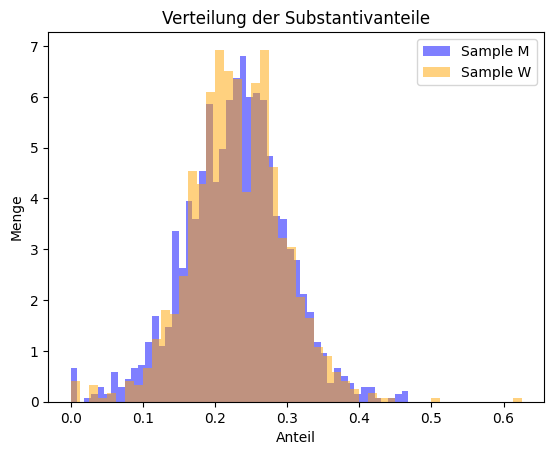

In [16]:
# Erstelle eine Figure und Axes-Objekte
fig, ax = plt.subplots()

# Plotten der Histogramme für beide Subsamples
ax.hist(noun_ratios_gender['m'], bins=50, alpha=0.5, label='Sample M', color='blue', density=True)
ax.hist(noun_ratios_gender['w'], bins=50, alpha=0.5, label='Sample W', color='orange', density=True)

# Hinzufügen von Labels und Titeln
ax.set_xlabel('Anteil')
ax.set_ylabel('Menge')
ax.set_title('Verteilung der Substantivanteile')

# Legende anzeigen
ax.legend()

# Anzeigen der Grafik
plt.show()

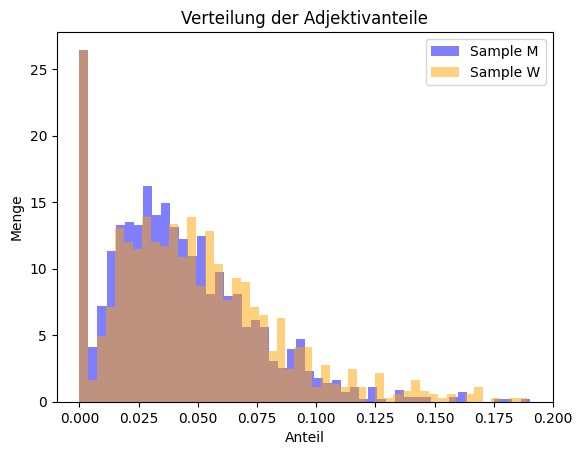

In [17]:
# Erstelle eine Figure und Axes-Objekte
fig, ax = plt.subplots()

# Plotten der Histogramme für beide Subsamples
ax.hist(adjectives_ratios_gender['m'], bins=50, alpha=0.5, label='Sample M', color='blue', density=True)
ax.hist(adjectives_ratios_gender['w'], bins=50, alpha=0.5, label='Sample W', color='orange', density=True)

# Hinzufügen von Labels und Titeln
ax.set_xlabel('Anteil')
ax.set_ylabel('Menge')
ax.set_title('Verteilung der Adjektivanteile')

# Legende anzeigen
ax.legend()

# Anzeigen der Grafik
plt.show()